In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import gaussian_kde

file_path = '/content/PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, delimiter=';')

# Analisando os dados 🔎

In [76]:
# Tem algumas inconsistências de nomenclatura em relação ao dataset e o PDF de dicionário, mas acho que tudo bem...
# Reparei também que temos colunas faltando, sendo elas: **REC_PSICO_2021**, **REC_PSICO_2022** e **INSTITUICAO_ENSINO_ALUNO_2022**.

**Essa linha demonstra que o Aluno foi ingressado em 2022, e todas as outras colunas são nulas. Uma recomendação seria criar para cada ano um dataset separado para início das análises.** 🤔

In [77]:
pd.DataFrame(df.loc[df['NOME'] == 'ALUNO-2']).transpose().T

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.2,9.433333,NaN,2.0,5.625,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)


In [78]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [80]:
df['PONTO_VIRADA_2021'].value_counts()


,count
PONTO_VIRADA_2021,
Não,576
Sim,108
#NULO!,2


# Tivemos adição de colunas novas no dataset ao longo do tempo 🤔

In [81]:
len(df.columns[df.columns.str.contains('2020')])

18

In [82]:
df.columns[df.columns.str.contains('2020')]

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'IDADE_ALUNO_2020', 'ANOS_PM_2020',
       'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020'],
      dtype='object')

In [83]:
len(df.columns[df.columns.str.contains('2021')])

20

In [84]:
df.columns[df.columns.str.contains('2021')]

Index(['FASE_2021', 'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021'],
      dtype='object')

In [85]:
len(df.columns[df.columns.str.contains('2022')])

30

In [86]:
df.columns[df.columns.str.contains('2022')]

Index(['FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'IPP_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

# Funções reutilizáveis 🤓

In [87]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [88]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [89]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

In [90]:
def plot_bar(df, col, titulo, xaxis, yaxis='Qty'):
  grupos = df[col].value_counts()

  fig = go.Figure(
      go.Bar(
          x=grupos.index,
          y=grupos,
          text=grupos,
          textposition='auto'
      )
  )

  fig.update_layout(
      title=titulo,
      xaxis=dict(tickmode='linear'),
      xaxis_title=xaxis,
      yaxis_title=yaxis,
  )

  fig.show()

def plot_histograma(df, col, titulo, rug=True):
  # faz o cálculo do KDE com o scipy
  data = df[col].values
  kde = gaussian_kde(data)
  x_vals = np.linspace(min(data), max(data), 1000)
  kde_vals = kde(x_vals)

  # faz o cálculo da quantidade ótima de bins (assim evitamos agrupamentos desnecessários)
  bins = len(np.histogram_bin_edges(data, bins='auto'))

  # cria os plots separados (histograma + kde + rug)
  # 1. histograma
  histogram = go.Histogram(x=data, nbinsx=bins, histnorm='probability density', name=f'Density: {col}')

  # 2. kde
  kde_line = go.Scatter(x=x_vals, y=kde_vals, mode='lines', name='Curve (KDE)', line=dict(color='red'))

  # 3. rug, mas apenas se ele tiver sido requisitado
  if rug:
    rug_plot = go.Scatter(
        x=data,
        y=[-0.01] * len(data),
        mode='markers',
        name='Obs',
        marker=dict(color='black', symbol='line-ns-open', size=10)
    )

  # figura principal
  fig = go.Figure()
  fig.add_trace(histogram)
  fig.add_trace(kde_line)
  fig.update_traces(texttemplate='%{y:.2%}', textposition='outside', selector=dict(type='histogram'))

  # configs
  fig.update_layout(
      title=titulo,
      xaxis_title='Value',
      yaxis_title='Frequency',
      yaxis=dict(range=[0, max(kde_vals) + 0.1]),
      bargap=0.015,
      uniformtext_mode='hide'
  )

  # configs com rug
  if rug:
    fig.add_trace(rug_plot)
    fig.update_layout(yaxis=dict(range=[-0.02, max(kde_vals) + 0.1]))
  # configs sem rug
  else:
    fig.update_layout(xaxis=dict(tickmode='linear'))

  fig.show()


def plot_boxplot(df, col, titulo):
  fig = px.box(y=df[col], points="all", title=titulo)

  fig.update_layout(
      yaxis_title='Valor'
  )

  fig.update_yaxes(dtick=1)

  fig.show()



def plot_boxplot_comparativo(df, col):
  fig = px.box(data_frame=df, x='ANO', y=col, points="all", title=f'Distribuição do {col} comparativa', color='ANO')

  fig.update_layout(
      yaxis_title='Valor'
  )

  fig.update_yaxes(dtick=1)

  fig.show()

In [91]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

# DF - 2020




In [92]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10


In [93]:
len(df_2020) # com NaN

1349

In [94]:
df_2020.infer_objects().dtypes

,0
INSTITUICAO_ENSINO_ALUNO_2020,object
NOME,object
IDADE_ALUNO_2020,object
ANOS_PM_2020,object
FASE_TURMA_2020,object
PONTO_VIRADA_2020,object
INDE_2020,object
INDE_CONCEITO_2020,object
PEDRA_2020,object
DESTAQUE_IEG_2020,object


In [95]:
#df_2020[['IDADE_ALUNO_2020','ANOS_PM_2020', 'INDE_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']]=df_2020[['IDADE_ALUNO_2020','ANOS_PM_2020', 'INDE_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']].apply(pd.to_numeric)

In [96]:
df_2020.iloc[1258]

,1258
INSTITUICAO_ENSINO_ALUNO_2020,V202
NOME,ALUNO-1259
IDADE_ALUNO_2020,D108
ANOS_PM_2020,D971
FASE_TURMA_2020,D207
PONTO_VIRADA_2020,D9600
INDE_2020,D980
INDE_CONCEITO_2020,D9891/2
PEDRA_2020,D9891/2A
DESTAQUE_IEG_2020,D301


In [97]:
df_2020.drop(index=1258,axis=1,inplace=True)

<ipython-input-97-c5761fcd092f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.drop(index=1258,axis=1,inplace=True)


In [98]:
df_2020[['IDADE_ALUNO_2020','ANOS_PM_2020', 'INDE_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']]=df_2020[['IDADE_ALUNO_2020','ANOS_PM_2020', 'INDE_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']].apply(pd.to_numeric)

<ipython-input-98-682d49b563d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020[['IDADE_ALUNO_2020','ANOS_PM_2020', 'INDE_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']]=df_2020[['IDADE_ALUNO_2020','ANOS_PM_2020', 'INDE_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']].apply(pd.to_numeric)


In [99]:
df_2020 = cleaning_dataset(df_2020)
len(df_2020)

727

In [100]:
df_2020['INSTITUICAO_ENSINO_ALUNO_2020'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2020,
Escola Pública,598
Rede Decisão/União,101
FIAP,11
UNISA,10
Estácio,3
Einstein,2
Escola João Paulo II,2


In [101]:
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11.0,2.0,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10.0
2,Escola Pública,ALUNO-3,12.0,2.0,3H,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10.0
3,Escola Pública,ALUNO-4,10.0,2.0,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5.0
4,Escola Pública,ALUNO-5,10.0,1.0,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10.0
7,Rede Decisão/União,ALUNO-8,14.0,3.0,4L,Sim,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10.0


In [102]:
df_2020['PEDRA_2020'].value_counts()

,count
PEDRA_2020,
Ametista,336
Ágata,171
Quartzo,128
Topázio,92


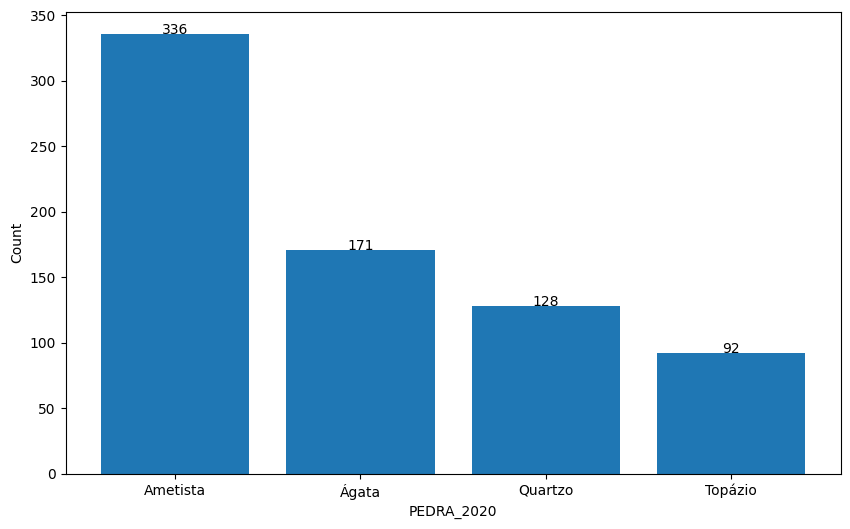

In [103]:
plot_exact_counter(size=(10, 6), x='PEDRA_2020', y=df_2020['PEDRA_2020'].value_counts(), df=df_2020)

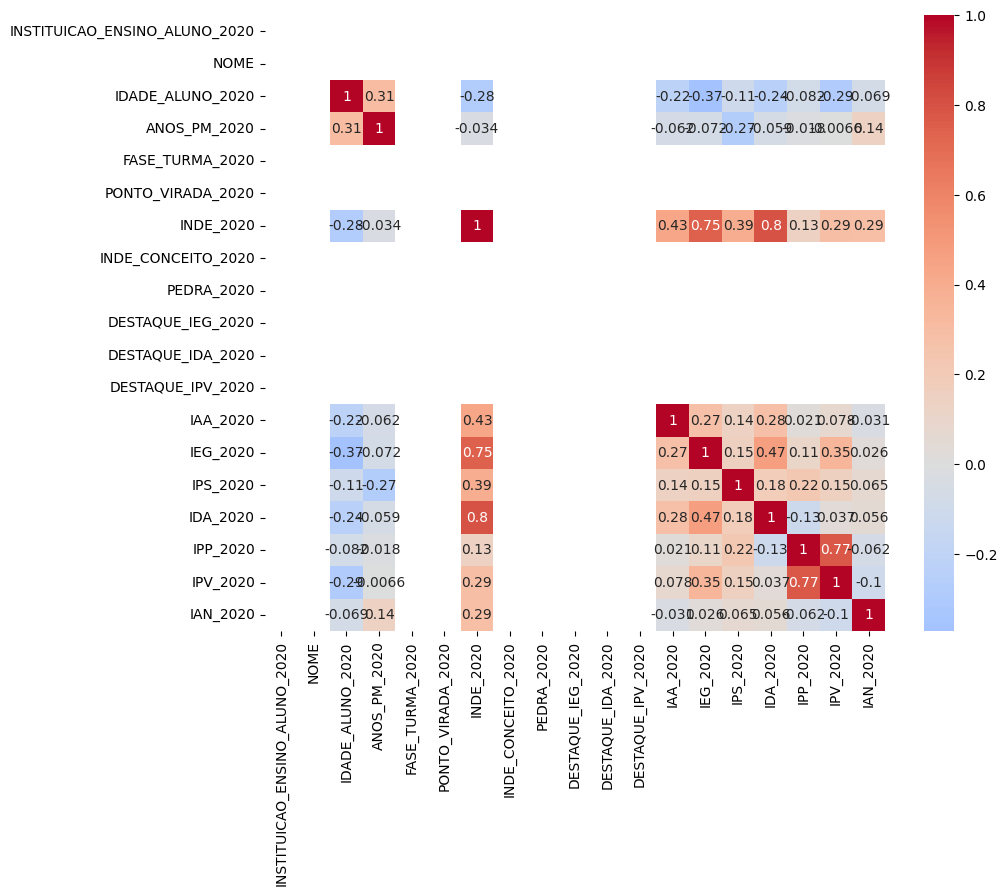

In [104]:
analyse_corr(df_2020)

# **Ideias** 🤔

* Predição de desempenho futuro e análise de outliers (*O que fez alguns alunos serem um dos melhores que já passou na Passos?*)
* Predição para recomendação de bolsas, intercambio, etc
* Análise comparatória de 2020, 2021 e 2022
* Análise de alunos (*de forma individual? 🤔*) ao longo dos anos (*Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?*)
* Análise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.
* Tentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada


# 2021

In [105]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


In [106]:
#df_2021[['FASE_2021','INDE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021','DEFASAGEM_2021']].apply(pd.to_numeric).dtypes

In [107]:
df_2021 = df_2021.replace('#NULO!', np.nan)
display(len(df_2021))
df_2021.iloc[32]

686

,70
NOME,ALUNO-71
FASE_2021,0.0
TURMA_2021,J
INSTITUICAO_ENSINO_ALUNO_2021,Escola Pública
SINALIZADOR_INGRESSANTE_2021,Veterano
PEDRA_2021,NaN
INDE_2021,NaN
IAA_2021,7.4
IEG_2021,0.0
IPS_2021,5.0


In [108]:
df_2021 = cleaning_dataset(df_2021)
len(df_2021)

686

In [109]:
df_2021[['FASE_2021','INDE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021','DEFASAGEM_2021']]=df_2021[['FASE_2021','INDE_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'IPV_2021', 'IAN_2021','DEFASAGEM_2021']].apply(pd.to_numeric)

In [110]:
df_2021['INSTITUICAO_ENSINO_ALUNO_2021'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2021,
Escola Pública,557
Rede Decisão,127
Escola JP II,2


In [111]:
df_2021['PEDRA_2021'].value_counts()

,count
PEDRA_2021,
Ametista,295
Ágata,178
Quartzo,110
Topázio,101


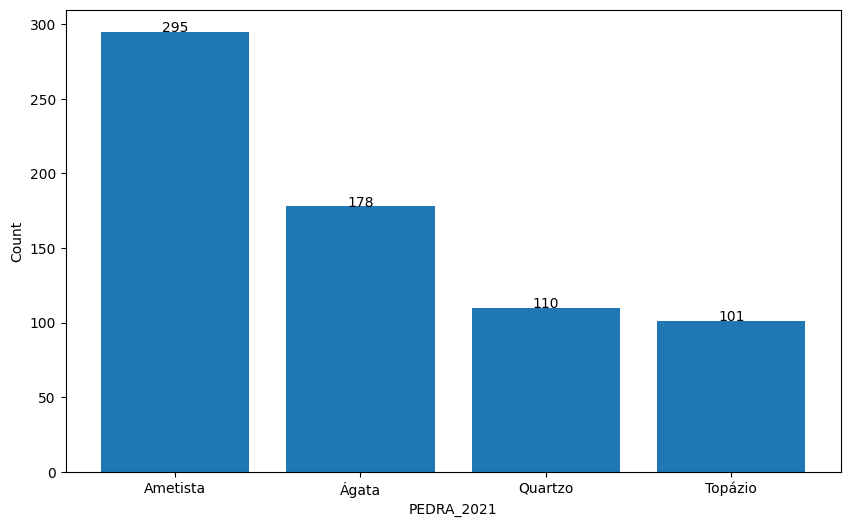

In [112]:
plot_exact_counter(size=(10, 6), x='PEDRA_2021', y=df_2021['PEDRA_2021'].value_counts(), df=df_2021)

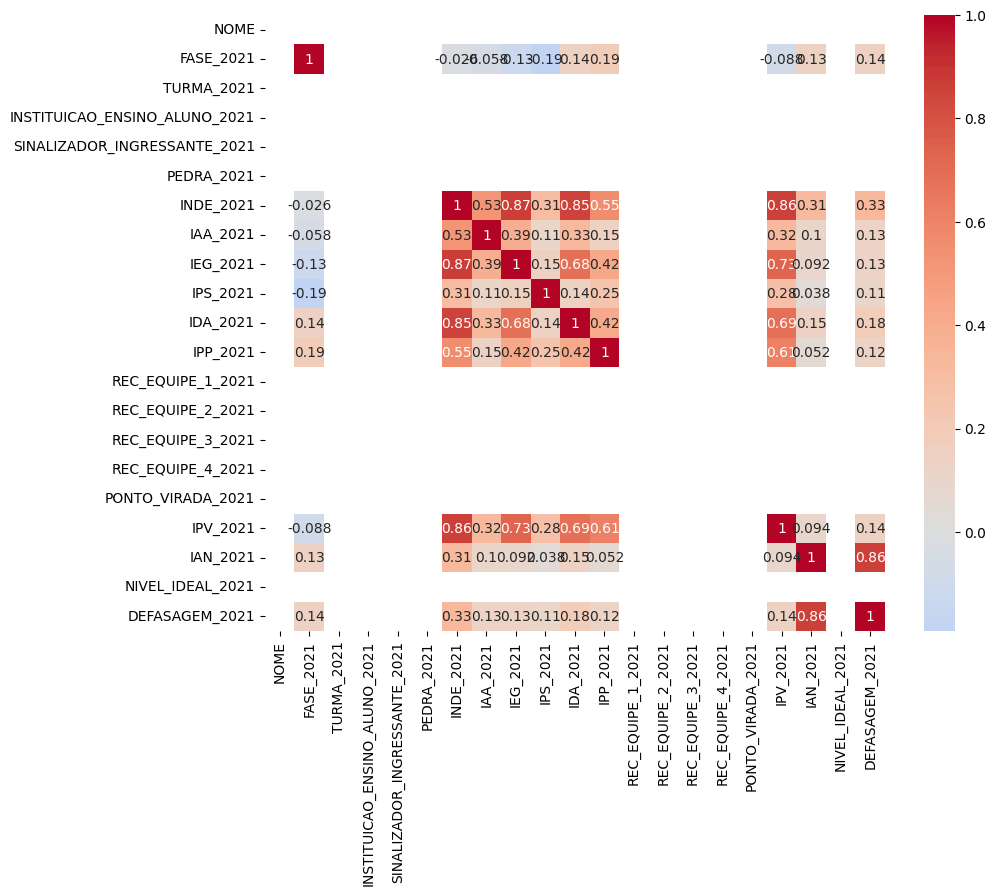

In [113]:
analyse_corr(df_2021)

# 2022

In [114]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [115]:
df_2022[['FASE_2022','ANO_INGRESSO_2022','INDE_2022','CG_2022','CF_2022','CT_2022','IAA_2022','IEG_2022','IPS_2022','IDA_2022','IPP_2022','IPV_2022','IAN_2022','NOTA_PORT_2022','NOTA_MAT_2022','NOTA_ING_2022','QTD_AVAL_2022']]=df_2022[['FASE_2022','ANO_INGRESSO_2022','INDE_2022','CG_2022','CF_2022','CT_2022','IAA_2022','IEG_2022','IPS_2022','IDA_2022','IPP_2022','IPV_2022','IAN_2022','NOTA_PORT_2022','NOTA_MAT_2022','NOTA_ING_2022','QTD_AVAL_2022']].apply(pd.to_numeric)

In [116]:
df_2022['PEDRA_2022'].value_counts()

,count
PEDRA_2022,
Ametista,348
Ágata,250
Quartzo,134
Topázio,130


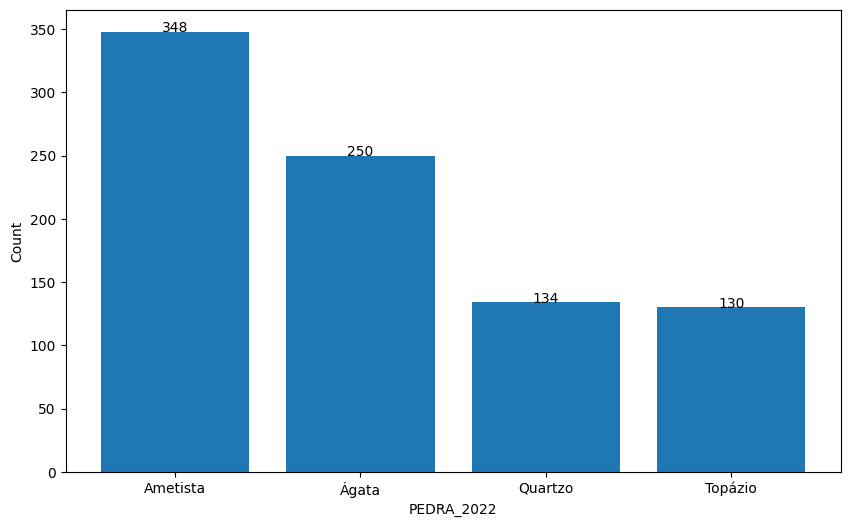

In [117]:
plot_exact_counter(size=(10, 6), x='PEDRA_2022', y=df_2022['PEDRA_2022'].value_counts(), df=df_2022)

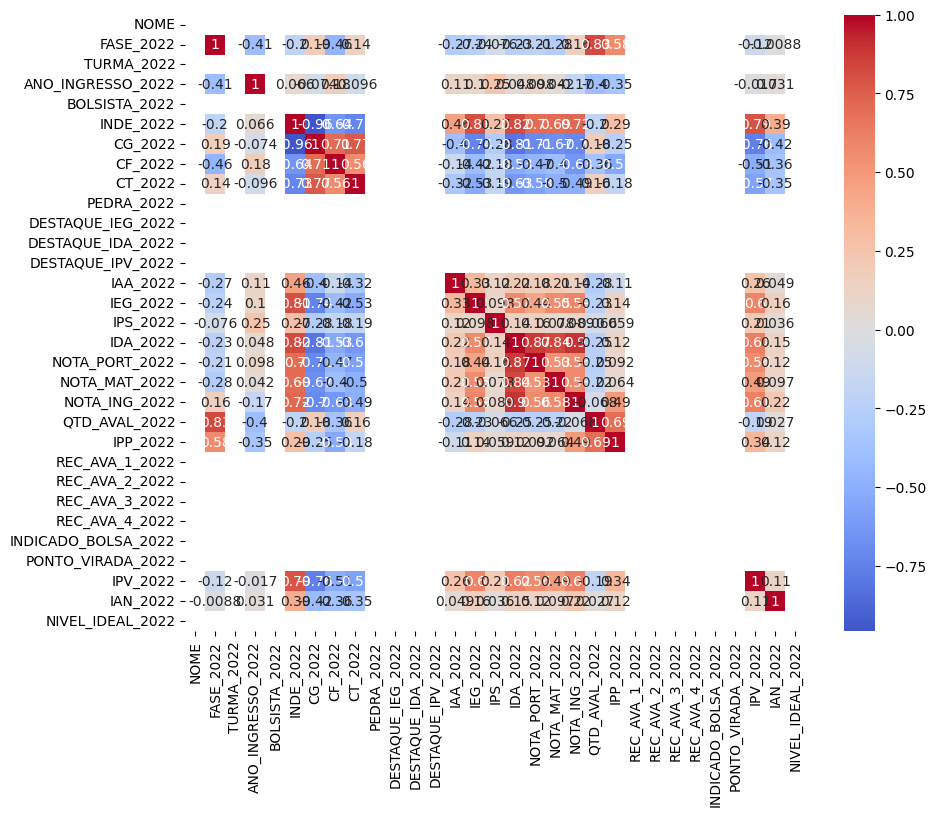

In [118]:
analyse_corr(df_2022)

In [119]:
plot_bar(df_2020, 'INSTITUICAO_ENSINO_ALUNO_2020', 'Education Institutions in 2020', xaxis='Education Ins.')


In [120]:
plot_bar(df_2021, 'INSTITUICAO_ENSINO_ALUNO_2021', 'Education Institutions in 2021', xaxis='Education Ins.')


In [121]:
plot_histograma(df_2020, 'INDE_2020', 2020)
plot_histograma(df_2021.dropna(), 'INDE_2021', 2021)
plot_histograma(df_2022, 'INDE_2022', 2022)


## Análise Comparativa de 2020, 2021 e 2022


In [122]:
import pandas as pd

def padronizar_colunas(df, ano):
    """ Remove o sufixo do ano nas colunas e adiciona a coluna 'Ano' """
    df = df.copy()
    df.columns = [col.replace(f"_{ano}", "") for col in df.columns]  # Remover o sufixo do ano
    df["Ano"] = ano  # Adicionar a coluna Ano
    return df

# Aplicar a função nos três DataFrames
df_2020_clean = padronizar_colunas(df_2020, 2020)
df_2021_clean = padronizar_colunas(df_2021, 2021)
df_2022_clean = padronizar_colunas(df_2022, 2022)

# Unir os três DataFrames em um único
df_merged = pd.concat([df_2020_clean, df_2021_clean, df_2022_clean], ignore_index=True)

# Exibir as primeiras linhas do novo DataFrame
df_merged.head()


,INSTITUICAO_ENSINO_ALUNO,NOME,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,Ano,FASE,TURMA,SINALIZADOR_INGRESSANTE,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,NIVEL_IDEAL,DEFASAGEM,ANO_INGRESSO,BOLSISTA,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA
0,Escola Pública,ALUNO-1,11.0,2.0,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Escola Pública,ALUNO-3,12.0,2.0,3H,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-4,10.0,2.0,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-5,10.0,1.0,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rede Decisão/União,ALUNO-8,14.0,3.0,4L,Sim,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

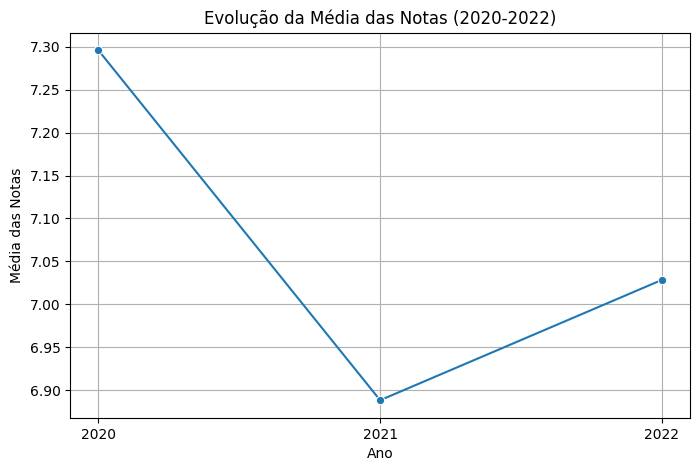

In [124]:
# Criar um novo DataFrame apenas com médias por ano
df_medias = pd.DataFrame({
    "Ano": ["2020", "2021", "2022"],
    "Média das Notas": [
        df_2020["INDE_2020"].mean(axis=0),
        df_2021["INDE_2021"].mean(),
        df_2022["INDE_2022"].mean()
    ]
})

# Plotando gráfico de evolução da média das notas
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_medias, x="Ano", y="Média das Notas", marker="o")
plt.xlabel("Ano")
plt.ylabel("Média das Notas")
plt.title("Evolução da Média das Notas (2020-2022)")
plt.grid(True)
plt.show()


## Análise de Alunos ao Longo dos Anos


In [125]:
df_merged

,INSTITUICAO_ENSINO_ALUNO,NOME,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,Ano,FASE,TURMA,SINALIZADOR_INGRESSANTE,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,NIVEL_IDEAL,DEFASAGEM,ANO_INGRESSO,BOLSISTA,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA
0,Escola Pública,ALUNO-1,11.0,2.0,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.50002,8.700000,7.500,7.000000,5.93750,7.750000,10.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Escola Pública,ALUNO-3,12.0,2.0,3H,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.900000,7.500,5.500000,8.12500,8.111113,10.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-4,10.0,2.0,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.00002,4.100000,6.875,0.000000,7.18750,7.750000,5.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-5,10.0,1.0,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8.000000,7.500,7.500000,8.43750,8.166665,10.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rede Decisão/União,ALUNO-8,14.0,3.0,4L,Sim,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.900000,4.375,7.333333,8.75000,8.944450,10.0,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,NaN,ALUNO-1342,NaN,NaN,NaN,Não,8.150001,NaN,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,7.91668,9.666667,7.500,7.750000,6.25000,7.500000,10.0,2022,2.0,K,NaN,NaN,NaN,NaN,NaN,Fase 2 (5º e 6º ano),NaN,2022.0,Não,99.0,13.0,1.0,6.000000,9.500000,NaN,3.0,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não
2271,NaN,ALUNO-1343,NaN,NaN,NaN,Não,5.674644,NaN,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.41668,6.470435,6.250,2.000000,6.25000,7.444443,5.0,2022,2.0,K,NaN,NaN,NaN,NaN,NaN,Fase 4 (9º ano),NaN,2018.0,Não,763.0,141.0,11.0,2.000000,2.000000,NaN,3.0,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não
2272,NaN,ALUNO-1346,NaN,NaN,NaN,Sim,8.135538,NaN,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,9.00002,9.031839,7.500,9.000000,5.62500,9.083340,5.0,2022,0.0,U,NaN,NaN,NaN,NaN,NaN,Fase 1 (4º ano),NaN,2022.0,Não,105.0,30.0,2.0,9.166667,8.833333,NaN,2.0,Promovido de Fase,Promovido de Fase,NaN,NaN,Não
2273,NaN,ALUNO-1348,NaN,NaN,NaN,Não,6.749981,NaN,Ágata,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.33334,9.178030,5.625,5.900000,6.71875,5.833328,5.0,2022,4.0,P,NaN,NaN,NaN,NaN,NaN,Fase 5 (1º EM),NaN,2018.0,Sim,567.0,51.0,6.0,4

In [126]:
#tabela_presenca

NameError: name 'tabela_presenca' is not defined

In [127]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO  1413 non-null   object 
 1   NOME                      2275 non-null   object 
 2   IDADE_ALUNO               727 non-null    float64
 3   ANOS_PM                   727 non-null    float64
 4   FASE_TURMA                727 non-null    object 
 5   PONTO_VIRADA              2247 non-null   object 
 6   INDE                      2273 non-null   float64
 7   INDE_CONCEITO             727 non-null    object 
 8   PEDRA                     2273 non-null   object 
 9   DESTAQUE_IEG              1589 non-null   object 
 10  DESTAQUE_IDA              1589 non-null   object 
 11  DESTAQUE_IPV              1565 non-null   object 
 12  IAA                       2275 non-null   float64
 13  IEG                       2275 non-null   float64
 14  IPS     

In [128]:
# Criar uma tabela que mostra em quais anos cada aluno esteve presente
tabela_presenca = df_merged.pivot_table(index="NOME", columns="Ano", values="INDE", aggfunc="count").fillna(0)

# Contar quantos anos cada aluno esteve presente
tabela_presenca["anos_no_programa"] = (tabela_presenca > 0).sum(axis=1)

# Alunos que saíram do programa (estavam em 2020 ou 2021, mas não em 2022)
alunos_desistentes = tabela_presenca[(tabela_presenca[2022] == 0) & (tabela_presenca["anos_no_programa"] > 1)]

print("Alunos que podem ter desistido:")
print(alunos_desistentes)


Alunos que podem ter desistido:
Ano         2020  2021  2022  anos_no_programa
NOME                                          
ALUNO-1      1.0   1.0   0.0                 2
ALUNO-1007   1.0   1.0   0.0                 2
ALUNO-1016   1.0   1.0   0.0                 2
ALUNO-1027   1.0   1.0   0.0                 2
ALUNO-1035   1.0   1.0   0.0                 2
...          ...   ...   ...               ...
ALUNO-951    1.0   1.0   0.0                 2
ALUNO-965    1.0   1.0   0.0                 2
ALUNO-973    1.0   1.0   0.0                 2
ALUNO-986    1.0   1.0   0.0                 2
ALUNO-999    1.0   1.0   0.0                 2

[141 rows x 4 columns]


In [129]:
df_merged = df_merged.rename(columns={
    'INSTITUICAO_ENSINO_ALUNO': 'instituicao_ensino_aluno',
    'NOME': 'nome',
    'IDADE_ALUNO': 'idade_aluno',
    'ANOS_PM': 'anos_na_pm',
    'FASE_TURMA': 'fase_turma',
    'PONTO_VIRADA': 'ponto_de_virada',
    'INDE': 'indice_desenvolvimento_educacional',
    'INDE_CONCEITO': 'indice_desenvolvimento_educacional_conceito',
    'PEDRA': 'pedra',
    'DESTAQUE_IEG': 'indicador_de_engajamento',
    'DESTAQUE_IDA': 'indicador_de_aprendizagem',
    'DESTAQUE_IPV': 'indicador_de_ponto_de_virada',
    'IAA': 'indicador_de_auto_avaliacao',
    'IEG': 'indicador_de_engajamento',
    'IPS': 'indicador_psicossocial',
    'IDA': 'indicador_de_aprendizagem',
    'IPP': 'indicador_psicopedagogico',
    'IPV': 'indicador_de_ponto_de_virada',
    'IAN': 'indicador_de_adequacao_de_nivel',
    'Ano': 'ano',
    'FASE': 'fase',
    'TURMA': 'turma',
    'SINALIZADOR_INGRESSANTE': 'sinalizador_ingressante',
    'REC_EQUIPE_1': 'recomendacao_equipe_1',
    'REC_EQUIPE_2': 'recomendacao_equipe_2',
    'REC_EQUIPE_3': 'recomendacao_equipe_3',
    'REC_EQUIPE_4': 'recomendacao_equipe_4',
    'NIVEL_IDEAL': 'nivel_ideal',
    'DEFASAGEM': 'defasagem',
    'ANO_INGRESSO': 'ano_ingresso',
    'BOLSISTA': 'bolsista',
    'CG': 'classificacao_geral_ranking',
    'CF': 'classificacao_fase_ranking',
    'CT': 'classificacao_turma_ranking',
    'NOTA_PORT': 'nota_port',
    'NOTA_MAT': 'nota_mat',
    'NOTA_ING': 'nota_ing',
    'QTD_AVAL': 'qtd_aval',
    'REC_AVA_1': 'recomendacao_avaliativa_1',
    'REC_AVA_2': 'recomendacao_avaliativa_2',
    'REC_AVA_3': 'recomendacao_avaliativa_3',
    'REC_AVA_4': 'recomendacao_avaliativa_4'
})

In [130]:
print(df_merged.columns)

Index(['instituicao_ensino_aluno', 'nome', 'idade_aluno', 'anos_na_pm',
       'fase_turma', 'ponto_de_virada', 'indice_desenvolvimento_educacional',
       'indice_desenvolvimento_educacional_conceito', 'pedra',
       'indicador_de_engajamento', 'indicador_de_aprendizagem',
       'indicador_de_ponto_de_virada', 'indicador_de_auto_avaliacao',
       'indicador_de_engajamento', 'indicador_psicossocial',
       'indicador_de_aprendizagem', 'indicador_psicopedagogico',
       'indicador_de_ponto_de_virada', 'indicador_de_adequacao_de_nivel',
       'ano', 'fase', 'turma', 'sinalizador_ingressante',
       'recomendacao_equipe_1', 'recomendacao_equipe_2',
       'recomendacao_equipe_3', 'recomendacao_equipe_4', 'nivel_ideal',
       'defasagem', 'ano_ingresso', 'bolsista', 'classificacao_geral_ranking',
       'classificacao_fase_ranking', 'classificacao_turma_ranking',
       'nota_port', 'nota_mat', 'nota_ing', 'qtd_aval',
       'recomendacao_avaliativa_1', 'recomendacao_avaliativa_2'

In [131]:
df_merged.to_csv('dados_tratados.csv', index=False)


In [132]:
from google.colab import files

files.download('dados_tratados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_merged.head()